In [ ]:
import pandas as pd
import numpy as np
import textblob

In [ ]:
# Some feature ideas

"""
The feature brainstorming cell
1) Number of swear words
2) Length of text
3) Dummy You
4) Textblob.sentiment polarity
5) Textblob.sentiment subjectivity
"""

'\nThe feature brainstorming cell\n1) Number of swear words\n2) Length of text\n3) Dummy You\n4) Textblob.sentiment polarity\n5) Textblob.sentiment subjectivity\n'

# Data Exploration and Visualization

In [ ]:
text = pd.read_csv("train.csv")

test = pd.read_csv("test_with_solutions.csv")
text.head()

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [ ]:
text["Comment"][4]

'"C\\xe1c b\\u1ea1n xu\\u1ed1ng \\u0111\\u01b0\\u1eddng bi\\u1ec3u t\\xecnh 2011 c\\xf3 \\xf4n ho\\xe0 kh\\xf4ng ? \\nC\\xe1c ng\\u01b0 d\\xe2n ng\\u1ed3i cu\\xed \\u0111\\u1ea7u chi\\u1ee5 nh\\u1ee5c c\\xf3 \\xf4n ho\\xe0 kh\\xf4ng ?\\nC\\xe1c n\\xf4ng d\\xe2n gi\\u1eef \\u0111\\u1ea5t \\u1edf V\\u0103n Giang, C\\u1ea7n Th\\u01a1 c\\xf3 \\xf4n ho\\xe0 kh\\xf4ng ?\\n.................\\nR\\u1ed1t cu\\u1ed9c \\u0111\\u01b0\\u1ee3c g\\xec\\xa0 th\\xec ch\\xfang ta \\u0111\\xe3 bi\\u1ebft !\\nAi c\\u0169ng y\\xeau chu\\u1ed9ng ho\\xe0 b\\xecnh, nh\\u01b0ng \\u0111\\xf4i khi ho\\xe0 b\\xecnh ch\\u1ec9 th\\u1eadt s\\u1ef1 \\u0111\\u1ebfn sau chi\\u1ebfn tranh m\\xe0 th\\xf4i.\\nKh\\xf4ng c\\xf2n con \\u0111\\u01b0\\u1eddng n\\xe0o ch\\u1ecdn kh\\xe1c \\u0111\\xe2u, \\u0111\\u1eebng m\\u01a1 th\\xeam n\\u01b0\\xe3."'

0.27


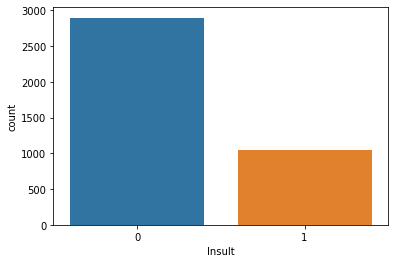

In [ ]:
import seaborn as sns

sns.countplot(x = "Insult", data = text)
prevalence = sum(text["Insult"]) / len(text["Insult"])
print(round(prevalence, 2))

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import plotly.express as px
import nltk
nltk.download('stopwords')


# Word Cloud stuff?
listform = text["Comment"].to_list()
lstoflsts = []

for i in range(len(listform)):
  lstoflsts.append(listform[i].split())

everyword = []

for i in range(len(lstoflsts)):
  for j in range(len(lstoflsts[i])):
    everyword.append(lstoflsts[i][j].strip('"\n,[].,\\?#...!-@_').lower())

onestring = " ".join(everyword)

#Every word in One String
onestring
#Every word in a list
everyword


stop_words = set(stopwords.words('english')) 
processed_words = []

for word in everyword: 
  if word not in stop_words: 
    processed_words.append(word)

d = {'nmptd23doodoo': processed_words}
yeeyee = pd.DataFrame(data = d)
zag = yeeyee.groupby('nmptd23doodoo')
he = {}

for name, group in zag: 
    he[name] = len(group)

yiff = pd.DataFrame.from_dict(he, orient='index', columns = ['Count'])
visdata = yiff.sort_values(by='Count', ascending = False)[1:50]


fig = px.bar(visdata, y='Count', title="50 most frequent words, less stop words and spaces")
fig.update_layout(
    xaxis_title="Word",
    autosize=False,
    width=1500,
    height=1200,
    paper_bgcolor="LightSteelBlue",
)

fig.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Feature Engineering

In [ ]:
 from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(analyzer='word', max_features = 500, stop_words="english")
X2 = vectorizer.fit_transform(text["Comment"])

test_set = vectorizer.transform(test["Comment"])

print(vectorizer.get_feature_names())
print(X2.toarray())



['000', '10', '2012', '50', 'able', 'act', 'actually', 'ago', 'agree', 'america', 'american', 'americans', 'anti', 'aren', 'article', 'ask', 'ass', 'att', 'away', 'baby', 'bad', 'based', 'beat', 'beautiful', 'believe', 'best', 'bet', 'better', 'big', 'bit', 'bitch', 'black', 'blog', 'blood', 'blow', 'book', 'born', 'boy', 'brain', 'bring', 'budget', 'bunch', 'bush', 'business', 'buy', 'called', 'calling', 'came', 'campaign', 'care', 'case', 'cause', 'chance', 'change', 'child', 'children', 'choose', 'claim', 'class', 'clear', 'clearly', 'com', 'come', 'comes', 'coming', 'comment', 'comments', 'complete', 'congress', 'conservative', 'conservatives', 'country', 'course', 'court', 'crap', 'cut', 'dad', 'damn', 'david', 'day', 'days', 'dead', 'deal', 'death', 'definitely', 'democrat', 'democrats', 'deserve', 'dick', 'did', 'didn', 'die', 'different', 'disqus', 'div', 'does', 'doesn', 'dog', 'doing', 'don', 'dont', 'doubt', 'drugs', 'dude', 'dumb', 'easy', 'eat', 'election', 'en', 'end', 'e

In [ ]:
top500 = pd.DataFrame(data=X2.toarray(), columns=vectorizer.get_feature_names())

top500_test = pd.DataFrame(data=test_set.toarray(), columns=vectorizer.get_feature_names())

In [ ]:
text["sentiment"] = text.Comment.apply(lambda x: textblob.TextBlob(x).sentiment.polarity)
text["subjectivity"] = text.Comment.apply(lambda x: textblob.TextBlob(x).sentiment.subjectivity)
text["You"] = text["Comment"].str.lower().str.contains("you")
text["You"] = np.where(text["You"], 1, 0)
text["Length"] = text.Comment.apply(lambda x: len(x))


test["sentiment"] = test.Comment.apply(lambda x: textblob.TextBlob(x).sentiment.polarity)
test["subjectivity"] = test.Comment.apply(lambda x: textblob.TextBlob(x).sentiment.subjectivity)
test["You"] = test["Comment"].str.lower().str.contains("you")
test["You"] = np.where(test["You"], 1, 0)
test["Length"] = test.Comment.apply(lambda x: len(x))



In [ ]:
full = pd.concat([text, top500], axis=1)
test_full = pd.concat([test, top500_test], axis=1)

full

,Insult,Date,Comment,sentiment,subjectivity,You,Length,000,10,2012,50,able,act,actually,ago,agree,america,american,americans,anti,aren,article,ask,ass,att,away,baby,bad,based,beat,beautiful,believe,best,bet,better,big,bit,bitch,black,blog,...,win,wing,wish,woman,women,won,wonder,word,words,work,worked,working,world,worse,wouldn,wow,wrong,www,x80,x99s,x99t,x9d,xa0,xa0and,xa0he,xa0i,xa0it,xa0the,xa0you,xc2,xe2,xe4r,ya,yeah,year,years,yes,yo,young,youtube
0,1,20120618192155Z,"""You fuck your dad.""",-0.400000,0.600000,1,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ...",0.200000,0.200000,1,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ...",0.170000,0.890000,1,390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
3,0,NaN,"""listen if you dont wanna get married to a man...",0.370000,0.516667,1,271,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...",0.000000,0.000000,0,728,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3942,1,20120502172717Z,"""you are both morons and that is never happening""",-0.800000,1.000000,1,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3943,0,20120528164814Z,"""Many toolbars include spell check, like Yahoo...",0.500000,0.500000,1,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3944,0,20120620142813Z,"""@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F...",0.000000,0.000000,0,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3945,0,20120528205648Z,"""How about Felix? He is sure turning into one ...",0.114815,0.425926,0,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = full.drop(["Insult", "Date", "Comment"], axis=1)
X

y = text["Insult"]
y


X_test = test_full.drop(["Insult", "Date", "Comment", "Usage"], axis=1)

y_test = test["Insult"]



In [ ]:
X

,sentiment,subjectivity,You,Length,000,10,2012,50,able,act,actually,ago,agree,america,american,americans,anti,aren,article,ask,ass,att,away,baby,bad,based,beat,beautiful,believe,best,bet,better,big,bit,bitch,black,blog,blood,blow,book,...,win,wing,wish,woman,women,won,wonder,word,words,work,worked,working,world,worse,wouldn,wow,wrong,www,x80,x99s,x99t,x9d,xa0,xa0and,xa0he,xa0i,xa0it,xa0the,xa0you,xc2,xe2,xe4r,ya,yeah,year,years,yes,yo,young,youtube
0,-0.400000,0.600000,1,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.200000,0.200000,1,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.170000,0.890000,1,390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
3,0.370000,0.516667,1,271,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.000000,0,728,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3942,-0.800000,1.000000,1,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3943,0.500000,0.500000,1,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3944,0.000000,0.000000,0,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3945,0.114815,0.425926,0,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Testing Out Different Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, auc, recall_score, precision_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_predict
from sklearn import metrics

param_grid = [
    {'n_estimators': np.arange(1, 1000), 
     'max_features': np.arange(100,500), 
     'max_depth': np.arange(30, 150),
     'max_samples': np.arange(1000,2500),
     'max_leaf_nodes': np.arange(10, 500),
     'min_samples_split' : np.arange(2, 50),
     'min_weight_fraction_leaf' : np.arange(0, 0.5)
     }
  ]

rf_clf = RandomForestClassifier(random_state=42)

grid_search = RandomizedSearchCV(rf_clf, param_grid, n_iter = 8, cv=5,
                           scoring='neg_mean_squared_error', random_state = 42,
                           return_train_score=True)

grid_search.fit(X, y)

forest_model = grid_search.best_estimator_

pred = forest_model.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=1)

print("AUC:", metrics.auc(fpr, tpr))
print("Accuracy:", accuracy_score(y_test,pred))
print("Recall:", recall_score(y_test, pred))
print("Precision Score:", precision_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))

AUC: 0.7219574750280994
Accuracy: 0.8273517189270873
Recall: 0.5007215007215007
Precision Score: 0.75764192139738
F1 Score: 0.6029539530842745


In [ ]:
print(forest_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=144, max_features=182,
                       max_leaf_nodes=160, max_samples=1630,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=38,
                       min_weight_fraction_leaf=0.0, n_estimators=665,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[1843  111]
 [ 346  347]]


In [ ]:
#Model 2: Logistic Model

param_grid2 = [
    {"penalty" : ["l1", "l2", "elasticnet"],
     "C" : [0.01, 0.1, 1, 10],
     "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
     "max_iter" : [10,100, 250]}
  ]

log_clf = LogisticRegression(random_state=42)

grid_search2 = RandomizedSearchCV(log_clf, param_grid2, cv=5,
                           scoring='neg_mean_squared_error', random_state=32,
                           return_train_score=True)

grid_search2.fit(X, y)

log_model = grid_search2.best_estimator_

pred = log_model.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=1)

print("AUC:", metrics.auc(fpr, tpr))
print("Accuracy:", accuracy_score(y_test,pred))
print("Recall:", recall_score(y_test, pred))
print("Precision Score:", precision_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedW

AUC: 0.7213072381956723
Accuracy: 0.8243294295428787
Recall: 0.5050505050505051
Precision Score: 0.7415254237288136
F1 Score: 0.6008583690987124


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
print(log_model)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
print(confusion_matrix(y_test, pred))

[[1832  122]
 [ 343  350]]


In [ ]:
from sklearn.svm import SVC

#Model 3: Support Vector Machine
param_grid = [
    {'C': [.01, .1, 1, 10,  100],
     'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
     'coef0': [0, 1]}
  ]

old = SVC(kernel="poly", random_state=42)

grid_search = RandomizedSearchCV(old, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X, y)

svc = grid_search.best_estimator_
pred = svc.predict(X_test)

print("AUC:", metrics.auc(fpr, tpr))
print("Accuracy:", accuracy_score(y_test,pred))
print("Recall:", recall_score(y_test, pred))
print("Precision Score:", precision_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))

In [ ]:
svc

In [ ]:
print(confusion_matrix(y_test, pred))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = [
    {"criterion" : ["gini", "entropy"],
     "splitter" : ["best", "random"],
     "max_depth" : [50, 75, 100, 125, 150],
     "max_features" : [100, 200, 300, 400, 500]}
  ]

dec_tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dec_tree, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X, y)

dec_model = grid_search.best_estimator_



#Model 4: Adaboost Decision Tree Classifier 
param_grid = [
     {'n_estimators': np.arange(0,800),
      'learning_rate' : np.arange(0.01,1),
      'algorithm' : ["SAMME.R", "SAMME"]}
  ]

ada_clf = AdaBoostClassifier(dec_model, random_state=42)

grid_search = RandomizedSearchCV(ada_clf, param_grid, n_iter=8, cv=5,
                           scoring='neg_mean_squared_error', random_state = 42,
                           return_train_score=True)

grid_search.fit(X, y)

ada_model = grid_search.best_estimator_

pred = ada_model.predict(X_test)


print("AUC:", metrics.auc(fpr, tpr))
print("Accuracy:", accuracy_score(y_test,pred))
print("Recall:", recall_score(y_test, pred))
print("Precision Score:", precision_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))

In [ ]:
ada_model

In [ ]:
print(confusion_matrix(y_test, pred))

In [ ]:
from sklearn.ensemble import BaggingClassifier

#Model 5 BaggingClassifier Decision Tree 
bag_clf = BaggingClassifier(
    dec_tree, n_estimators=500,
    max_samples=2000, bootstrap=True, random_state=42)

bag_clf.fit(X, y)
pred = bag_clf.predict(X_test)

print("AUC:", metrics.auc(fpr, tpr))
print("Accuracy:", accuracy_score(y_test,pred))
print("Recall:", recall_score(y_test, pred))
print("Precision Score:", precision_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))

In [ ]:
bag_clf

In [ ]:
print(confusion_matrix(y_test, pred))

## The Final Ensemble Model

In [ ]:
from sklearn.ensemble import VotingClassifier

estimators = [('log', log_model), ('rf', forest_model), ('bag', bag_clf)]

voting_total = VotingClassifier(estimators=estimators, voting="hard")

voting_total.fit(X, y)

final_pred = voting_total.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, final_pred, pos_label=1)

print("AUC:", metrics.auc(fpr, tpr))
print("Accuracy:", accuracy_score(y_test,final_pred ))
print("Recall:", recall_score(y_test, final_pred ))
print("Precision Score:", precision_score(y_test, final_pred ))
print("F1 Score:", f1_score(y_test, final_pred ))
print(confusion_matrix(y_test, final_pred ))

# Saving the Model

In [ ]:
import pickle
import os
from google.colab import drive

drive.mount('/content/drive')


In [ ]:
os.chdir('/content/drive/My Drive/ML Models')
print(os.getcwd())


In [ ]:
pkl_filename = "insult_model.pkl"

with open(pkl_filename, 'wb') as file:
  pickle.dump(voting_total, file)

# Demo

In [ ]:
pkl_filename = "insult_model.pkl"

with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)


In [ ]:
insult = "You're bad noob"

sentiment = textblob.TextBlob(insult).sentiment.polarity
subjectivity = textblob.TextBlob(insult).sentiment.subjectivity
length = len(insult)

indexofbad = vectorizer.get_feature_names().index('bad')

lst = [0] * 504

lst[0] = sentiment
lst[1] = subjectivity
lst[2] = 1
lst[3] = length
lst[indexofbad] = 1

lst = np.array(lst)

lst = lst.reshape(1, -1)

In [ ]:
pickle_model.predict(lst)